# Supervised Learning

## Statistical Learning


Suppose we observe a quantitative response **Y** and *p* different predictors **X**, $X=X_{1},X_{2},X_{3},\dots,X_{p}$. We assume that there's a relationship between Y and X such that
$Y = f(X)+\epsilon$

Consider a given estimate $\hat{f}$ and a set of predictors **X**, which yields the prediction $\hat{Y}= \hat{f}(X)$. Assume for a moment that both $\hat{f}$ and $X$ are fixed. Then, it is easy to show that:

$$
E(Y-\hat{Y})^2 = E[ f(X) + \epsilon - \hat{f}(X)]^2 = [ f(X) - \hat{f}(X)]^2 + Var(\epsilon)
$$

where $E(Y-\hat{Y})^2$ represents the average, or the expected value, of the squared difference between the predicted and the actual value of Y, and $Var(\epsilon)$ represents the variance associated with the error term $\epsilon$

### Mean Squared Error

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2
$$

## Linear Regression

$Y \approx \beta_0+\beta_1 X$ where $\beta_0$ is the intercept and $\beta_1$ is the slope and together are known as coeffiecients.

As such, once a model is trained, we can predict:
$$
\hat{y} = \hat{\beta_0} + \hat{\beta_1} x
$$

where $\hat{y}$ indicates a prediction of $Y$.

Let $\hat{y}_i = \hat{\beta_0}+\hat{\beta_1}x_i$ be the prediction for Y based on the ith value ox X, then $\epsilon_i=y_i-\hat{y}_i$ represents the ith residual. Then, 
we can define the residual sum of squares (RSS) as:
$$
RSS = \epsilon_{0}^2+\epsilon_{1}^2+\dots+\epsilon_{n}^2
$$
and the residual standard error (RSE) as:

$$
RSE = \sum_{i=1}^n(y_i-\hat{y}_i)^2
$$

In [3]:
library(MASS)

In [4]:
library(ISLR)

ERROR: Error in library(ISLR): there is no package called ‘ISLR’


In [5]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [6]:
lm.fit = lm(medv~lstat, data=Boston)

In [7]:
attach(Boston)
lm.fit = lm(medv~lstat)

In [8]:
lm.fit


Call:
lm(formula = medv ~ lstat)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [9]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [10]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [11]:
confint (lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


In [12]:
predict(lm.fit ,data.frame(lstat =(c(5 ,10 ,15) )),interval ="confidence")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


In [13]:
predict (lm.fit ,data.frame(lstat =(c(5 ,10 ,15) )),interval ="prediction")

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


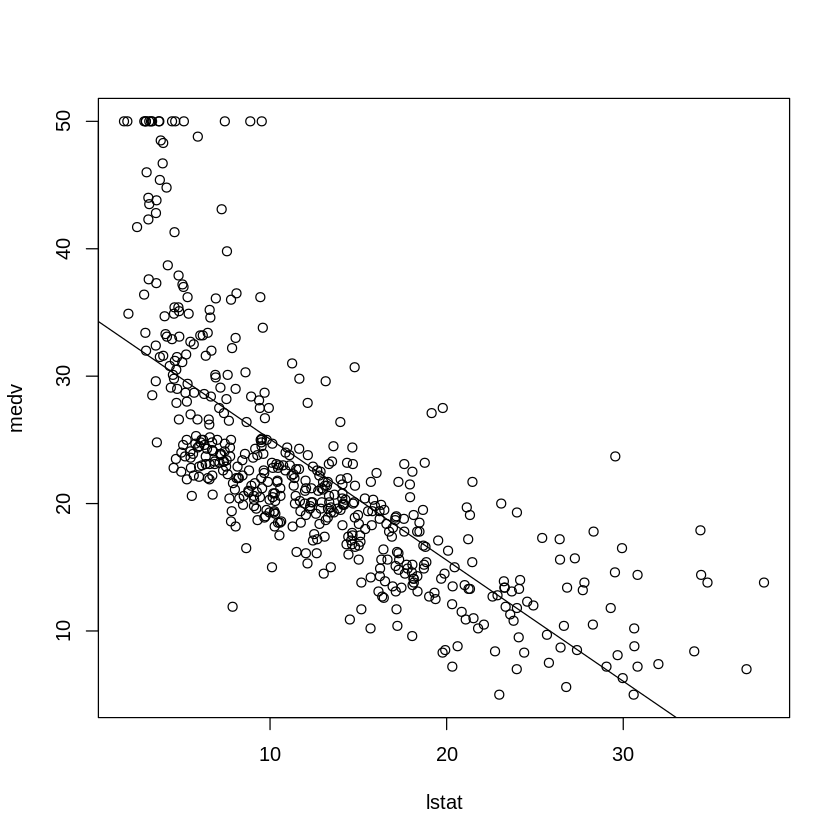

In [14]:
plot(lstat,medv)
abline(lm.fit)

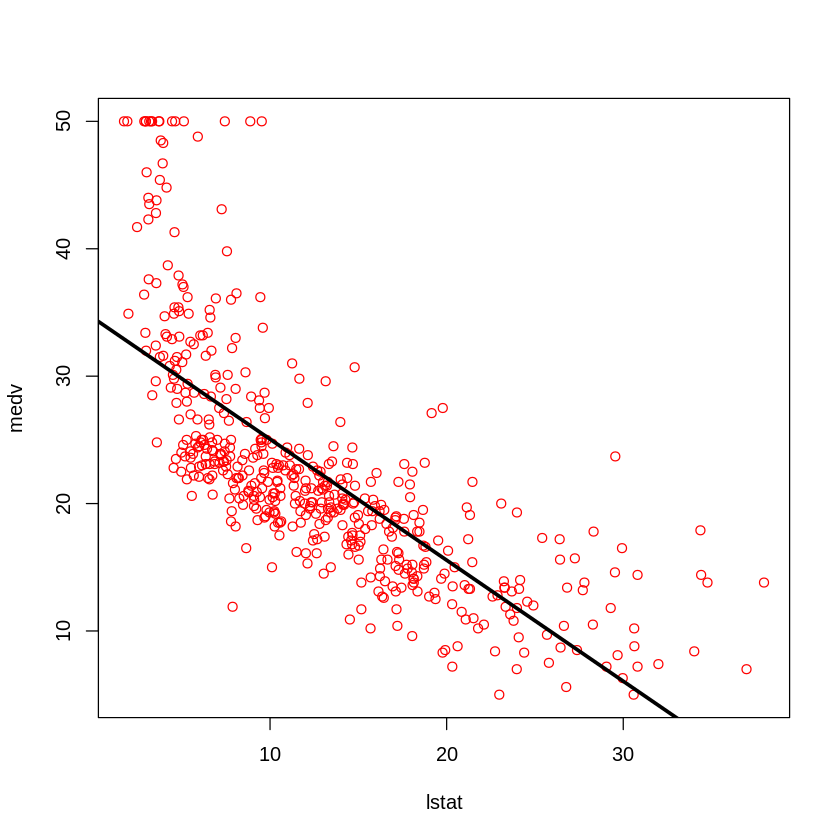

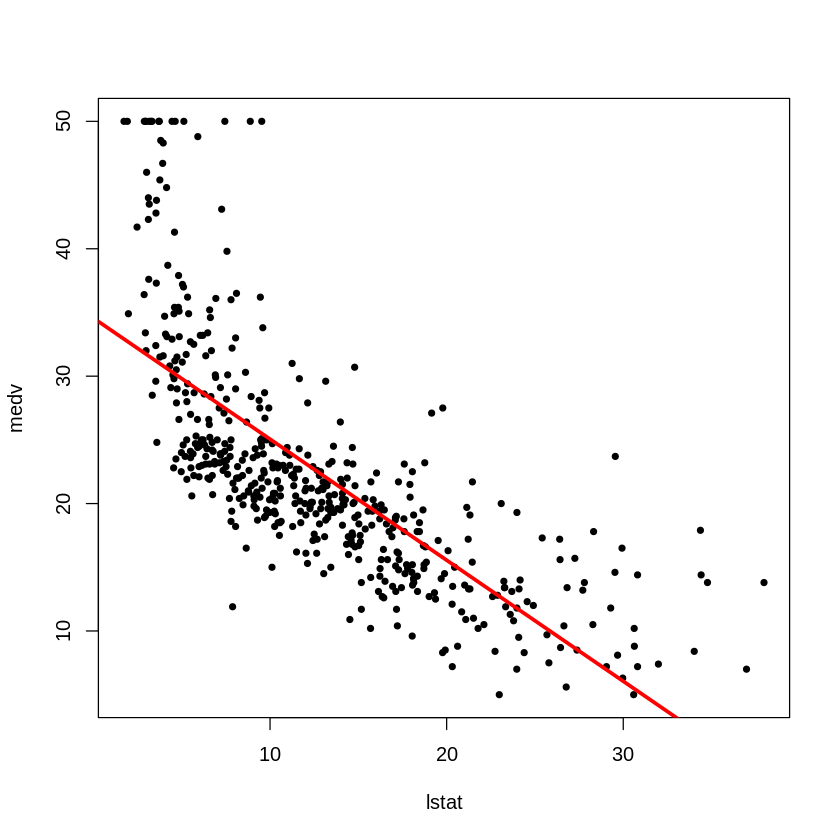

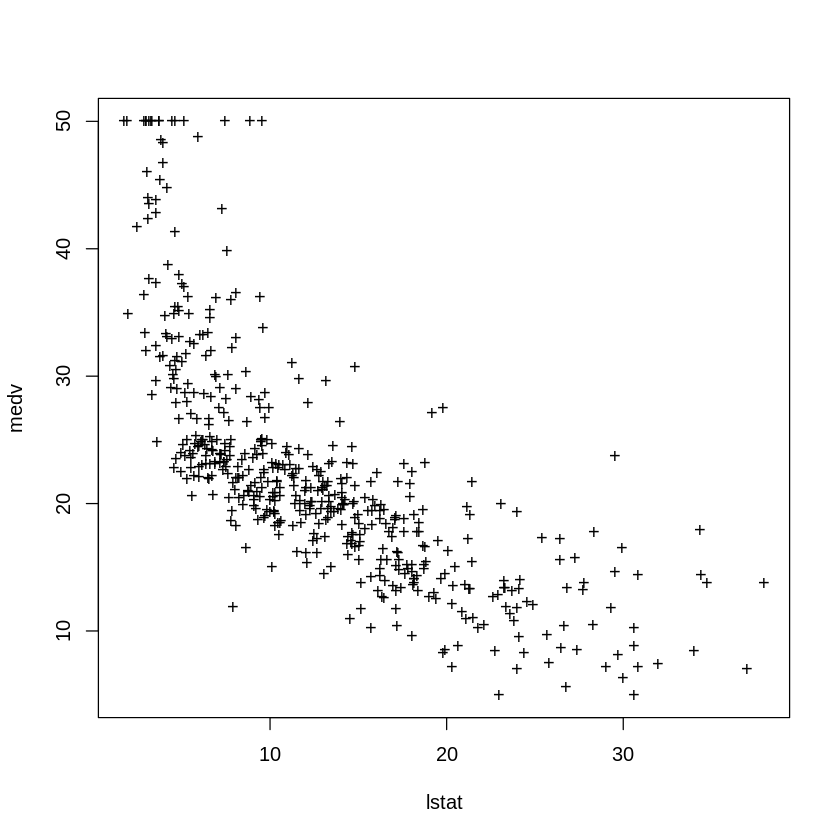

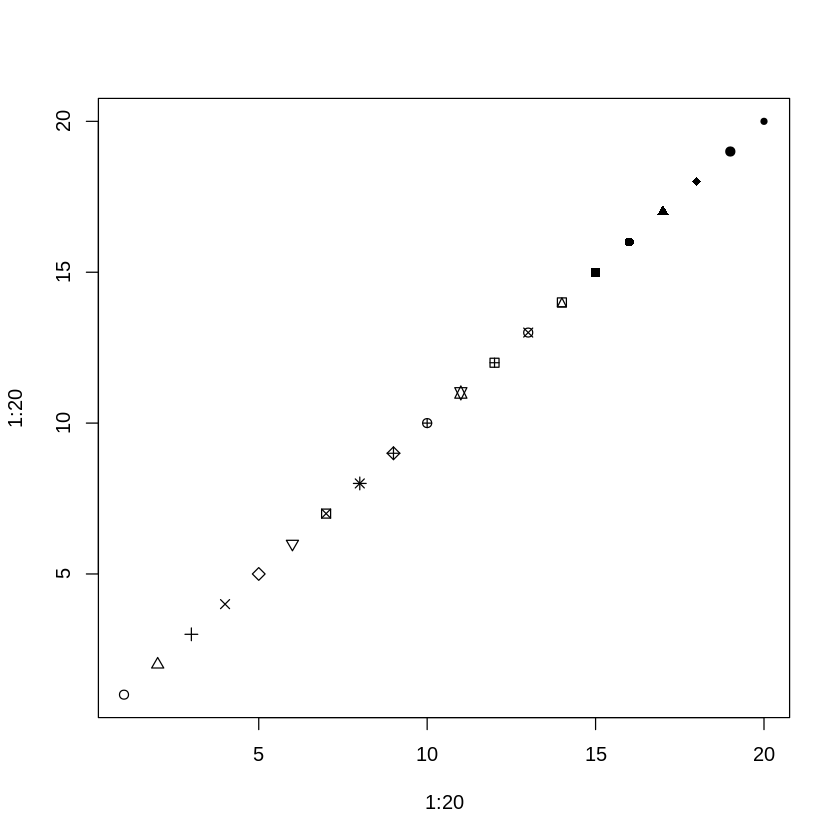

In [15]:
plot(lstat ,medv ,col ="red")
abline(lm.fit ,lwd =3)
plot(lstat ,medv ,pch =20)
abline(lm.fit ,lwd =3, col ="red")
plot(lstat ,medv ,pch ="+")
plot(1:20 ,1:20, pch =1:20)



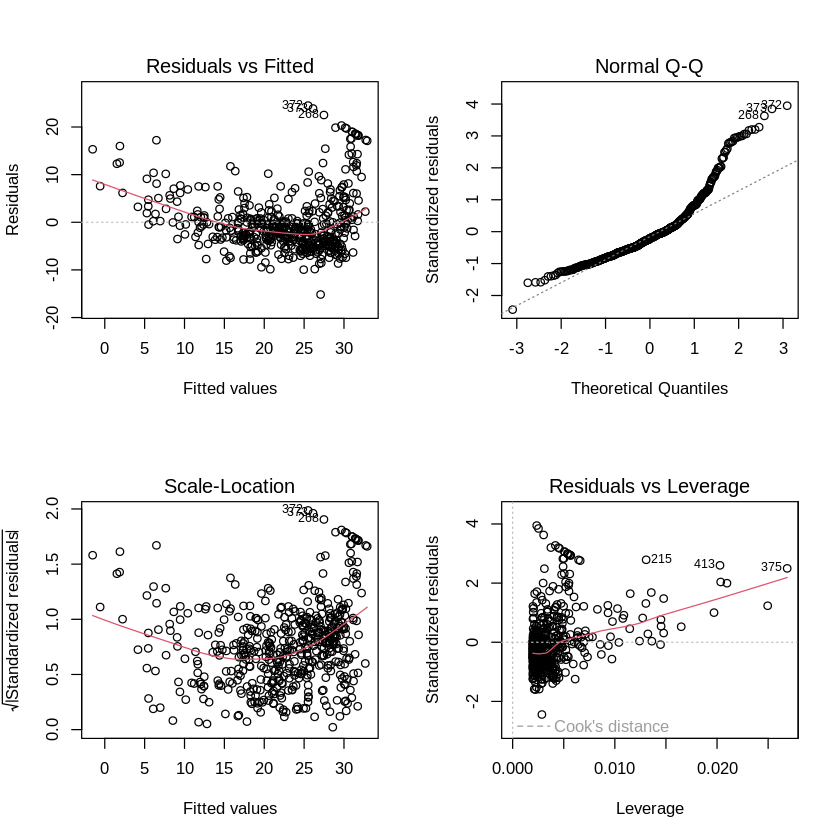

In [16]:
par(mfrow =c(2,2))
plot(lm.fit)

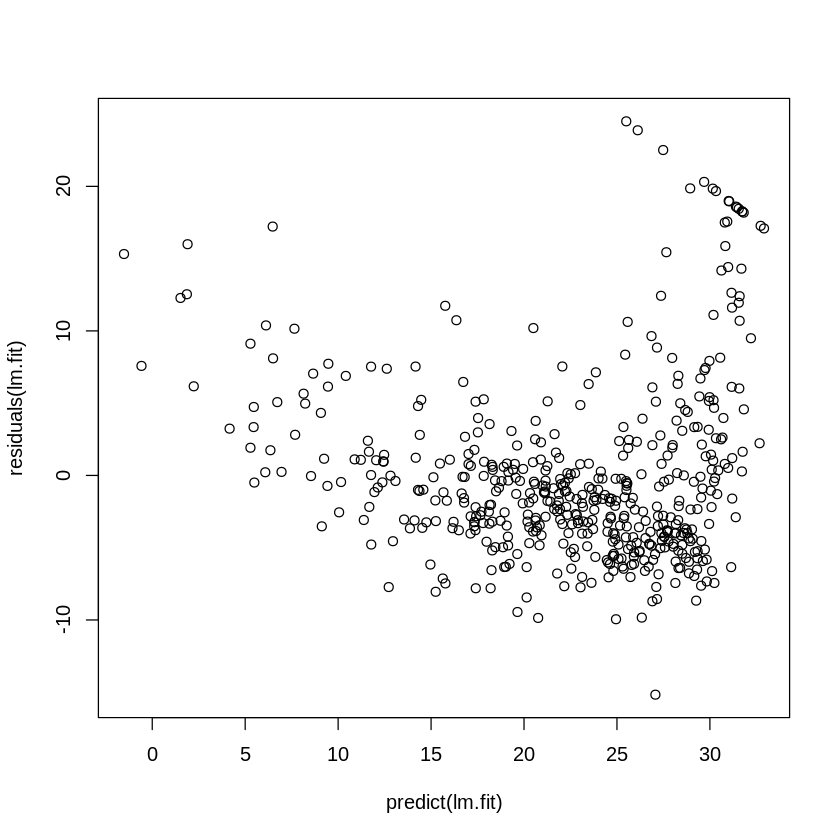

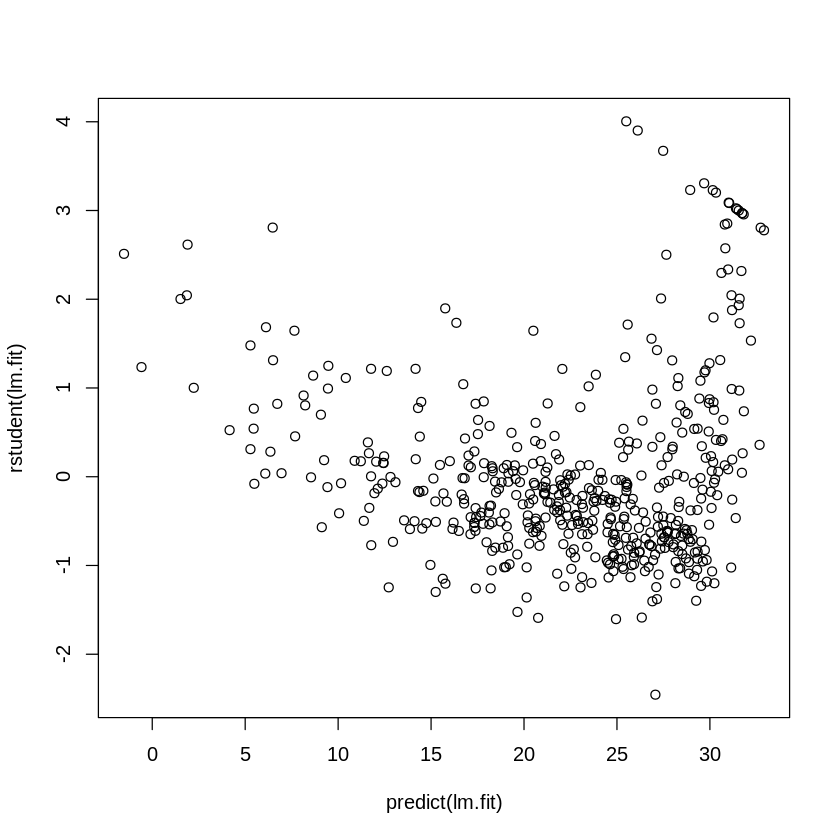

In [17]:
plot(predict (lm.fit), residuals (lm.fit))
plot(predict (lm.fit), rstudent (lm.fit))

375 
375

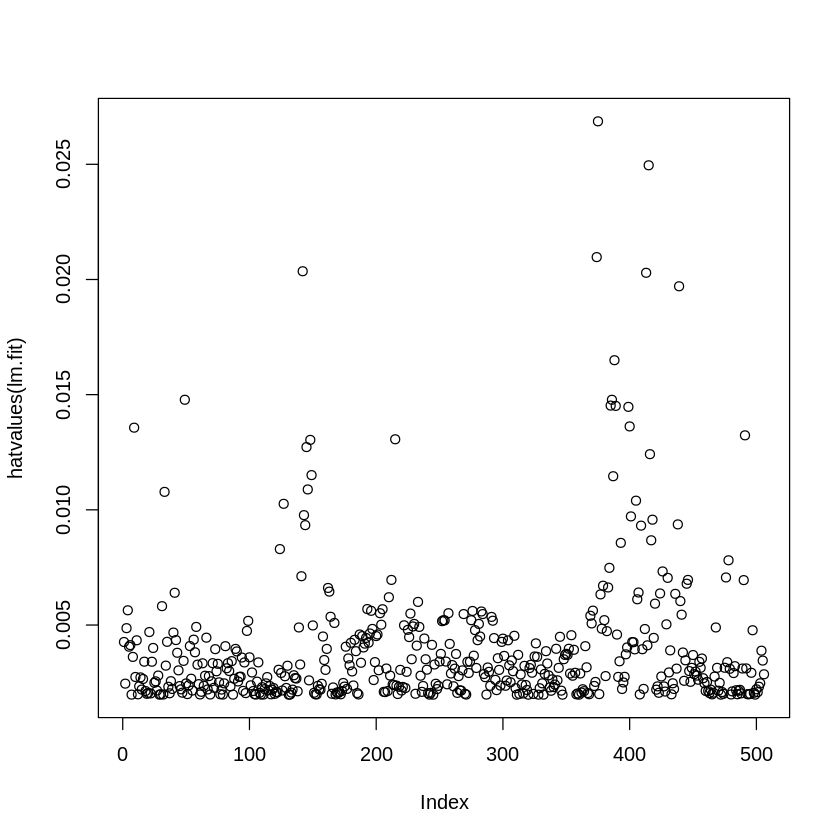

In [18]:
plot(hatvalues (lm.fit ))
which.max (hatvalues (lm.fit))

## Multiple Linear Regression

In [19]:
# lm(y~x1+x2+x3)
lm.fit = lm(medv~lstat+age,data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [20]:
lm.fit = lm(medv~.,data=Boston )
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0